In [1]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import statsmodels.api as sm
import xarray as xr
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
out_half = {}
out_dbl = {}
out_normal = {}

for out in ['evapotranspiration', 'runoff', 'snow', 'soil_moisture']:
    out_half[out] = xr.open_dataset(f"results/half_precip_output/{out}.nc")
    out_normal[out] = xr.open_dataset(f"results/fast_model/{out}.nc")
    out_dbl[out] = xr.open_dataset(f"results/dbl_precip_output/{out}.nc")

## Visualize one parameter in a map

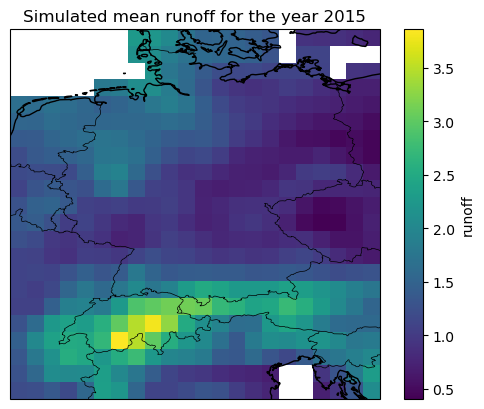

In [7]:
# Calculate Soil Moisture Mean Data for one year for all gridcells
year = 2015
out_param = 'runoff'

sm_data_year = out_dbl[out_param].sel(time=str(year))

sm_mean_data = sm_data_year[out_param].mean(dim='time')

# Create a plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.coastlines()

# Plot the data
sm_mean_data.plot.imshow(x='lon', y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax)

plt.title(f'Simulated mean {out_param} for the year {year}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Visualize one parameter in 3 maps for all variabilities

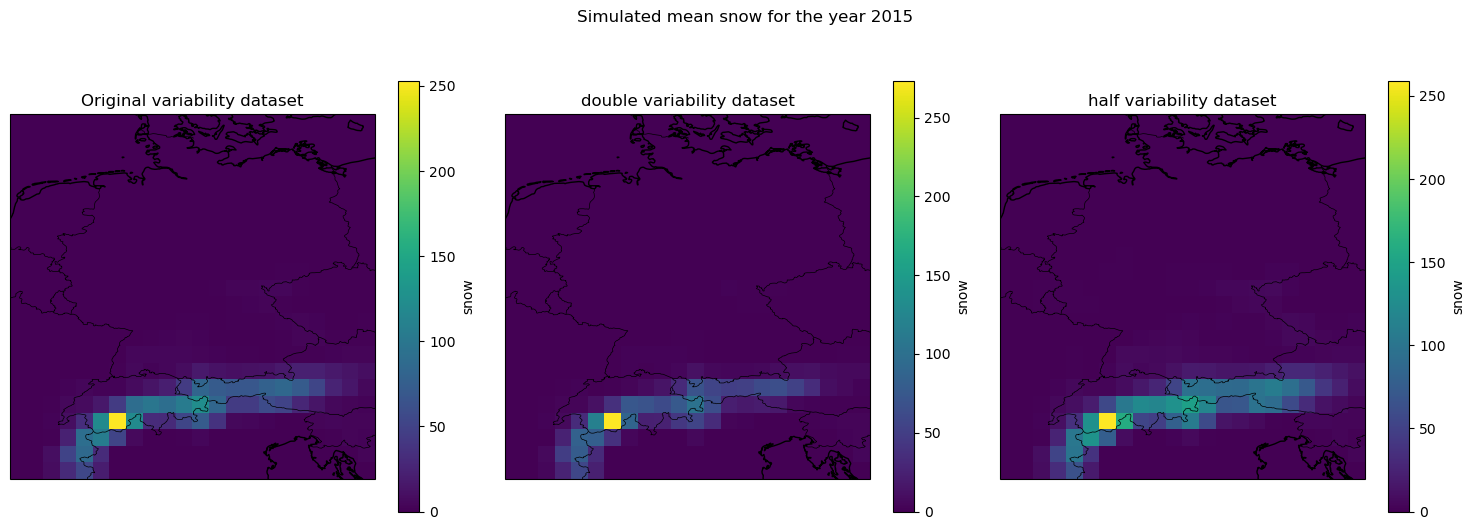

In [44]:
year = 2015
out_param = 'snow'

# Define the datasets
datasets = [out_normal[out_param], out_dbl[out_param], out_half[out_param]]
dataset_names = ['Original variability', 'double variability', 'half variability']

# Calculate Soil Moisture Mean Data for one year for all grid cells
year = 2015

sm_data_year = [ds.sel(time=str(year))[out_param].mean(dim='time') for ds in datasets]

# Create subplots
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 5))

# Loop through datasets and plot
for ax, sm_data, name in zip(axs, sm_data_year, dataset_names):
    # Add country borders and coastlines
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.coastlines()

    # Plot the data
    sm_data.plot.imshow(x='lon', y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax)
    
    ax.set_title(f'{name} dataset')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.suptitle(f'Simulated mean {out_param} for the year {year}', y=1.05)
plt.tight_layout()
plt.show()

## Visualize differences between variabilities in percent

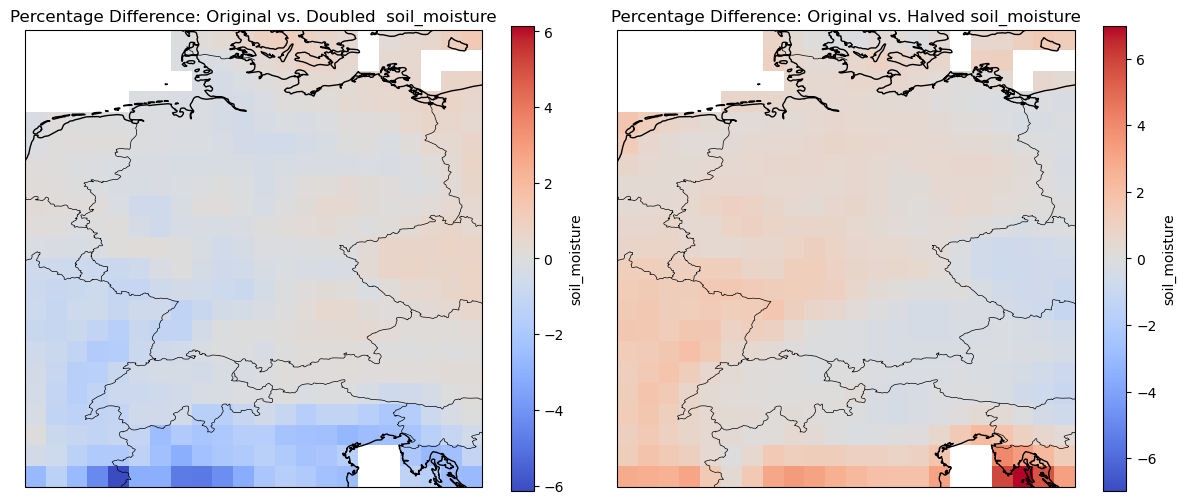

In [113]:
# Show the difference in percent
out_param = 'soil_moisture'

# Define the datasets
datasets = [out_normal[out_param], out_dbl[out_param], out_half[out_param]]
dataset_names = ['Original variability', 'Double variability', 'Half variability']
mean_values = []

# Calculate Means of dataset
mean_values_normal = datasets[0].groupby('time.dayofyear').mean(dim='time')
mean_values_normal = mean_values_normal[out_param].mean(dim='dayofyear')
mean_values_dbl = datasets[1].groupby('time.dayofyear').mean(dim='time')
mean_values_dbl = mean_values_dbl[out_param].mean(dim='dayofyear')
mean_values_half = datasets[2].groupby('time.dayofyear').mean(dim='time')
mean_values_half = mean_values_half[out_param].mean(dim='dayofyear')

# Calculate percentage difference between original and doubled/halved datasets
percentage_diff_double_ds = out_normal[out_param].copy()
percentage_diff_half_ds = out_normal[out_param].copy()
percentage_diff_double_ds[out_param] = ((mean_values_dbl - mean_values_normal) / mean_values_normal) * 100
percentage_diff_half_ds[out_param] = ((mean_values_half - mean_values_normal) / mean_values_normal) * 100

percentage_diff_double = percentage_diff_double_ds[out_param]
percentage_diff_half = percentage_diff_half_ds[out_param]

# Create subplots
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 5))

# Plot percentage difference between original and doubled dataset
percentage_diff_double.plot.imshow(cmap='coolwarm', transform=ccrs.PlateCarree(), ax=axs[0])
axs[0].set_title(f'Percentage Difference: Original vs. Doubled  {out_param}')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[0].coastlines()

# Plot percentage difference between original and halved dataset
percentage_diff_half.plot.imshow(cmap='coolwarm', transform=ccrs.PlateCarree(), ax=axs[1])
axs[1].set_title(f'Percentage Difference: Original vs. Halved {out_param}')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[1].coastlines()

plt.tight_layout()
plt.show()

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_20980\736314990.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


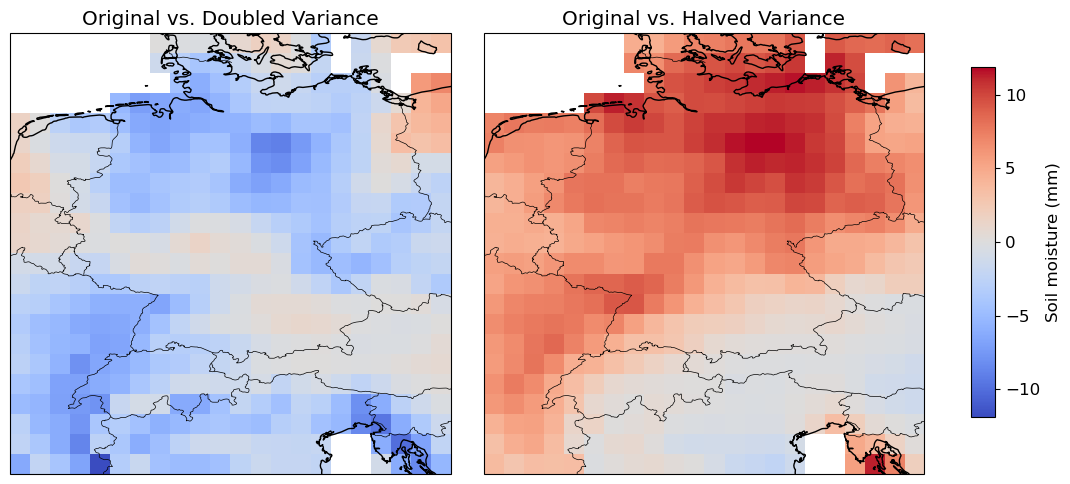

In [144]:
# Show the difference in percent
year = 2018
out_param = 'soil_moisture'

# Define the datasets
datasets = [out_normal[out_param], out_dbl[out_param], out_half[out_param]]
dataset_names = ['Original variability', 'Double variability', 'Half variability']
mean_values = []

# Calculate Means of dataset
mean_values_normal = datasets[0].sel(time=str(year))[out_param].mean(dim='time')
mean_values_dbl = datasets[1].sel(time=str(year))[out_param].mean(dim='time')
mean_values_half = datasets[2].sel(time=str(year))[out_param].mean(dim='time')

# Calculate percentage difference between original and doubled/halved datasets
percentage_diff_double_ds = out_normal[out_param].copy()
percentage_diff_half_ds = out_normal[out_param].copy()
percentage_diff_double_ds[out_param] = ((mean_values_dbl - mean_values_normal) / mean_values_normal) * 100
percentage_diff_half_ds[out_param] = ((mean_values_half - mean_values_normal) / mean_values_normal) * 100
percentage_diff_double = percentage_diff_double_ds[out_param]
percentage_diff_half = percentage_diff_half_ds[out_param]

# Create subplots with specific spacing and font size
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 5))
plt.rcParams.update({'font.size': 12})  # Update font size

# Plot percentage difference between original and doubled dataset
img = percentage_diff_double.plot.imshow(cmap='coolwarm', transform=ccrs.PlateCarree(), ax=axs[0], add_colorbar=False)
axs[0].set_title(f'Original vs. Doubled Variance')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[0].coastlines()

# Plot percentage difference between original and halved dataset
percentage_diff_half.plot.imshow(cmap='coolwarm', transform=ccrs.PlateCarree(), ax=axs[1], add_colorbar=False)
axs[1].set_title(f'Original vs. Halved Variance')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[1].coastlines()

# Adjust the gap between subplots and add colorbar
plt.subplots_adjust(wspace=-0.5)  # Adjust the gap between subplots
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust colorbar position
fig.colorbar(img, cax=cax, orientation='vertical', label='Soil moisture (mm)')

plt.tight_layout()
plt.savefig('figs/drought_year_map.svg', format='svg', transparent=True)
plt.show()

## Visualize Time Series for all variabilities for 1 gridcell for 1 year

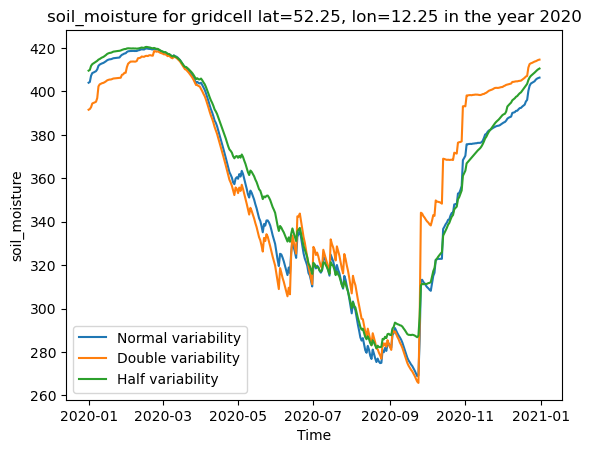

In [130]:
# Plot the time series of Soil Moisture for one year for one gridcell
out_param = 'soil_moisture'
year = 2020
lon = 12.25
lat = 52.25

sm_data_year_normal = out_normal[out_param].sel(time=str(year), lon=lon, lat=lat)
sm_data_year_dbl = out_dbl[out_param].sel(time=str(year), lon=lon, lat=lat)
sm_data_year_half = out_half[out_param].sel(time=str(year), lon=lon, lat=lat)


# Plot the soil moisture over time
plt.plot(sm_data_year_normal['time'], sm_data_year_normal[out_param], label='Normal variability')
plt.plot(sm_data_year_dbl['time'], sm_data_year_dbl[out_param], label='Double variability')
plt.plot(sm_data_year_half['time'], sm_data_year_half[out_param], label='Half variability')
plt.xlabel('Time')
plt.ylabel(f'{out_param}')
plt.title(f'{out_param} for gridcell lat={lat}, lon={lon} in the year {year}')
plt.legend()
plt.show()


## Visualize Time Series for all variabilities for 1 gridcell for mean over all years

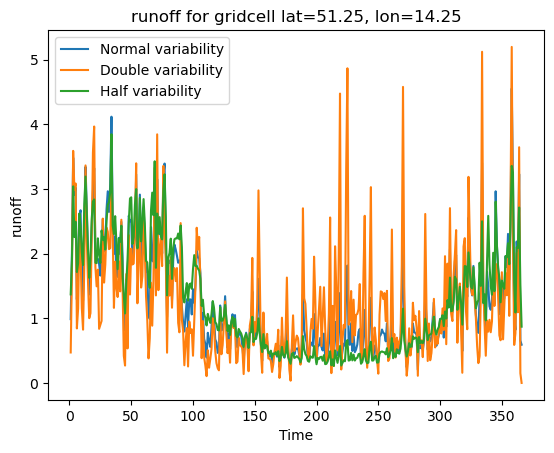

In [109]:
out_param = 'runoff'


lons = [4.75, 5.25, 5.75, 6.25, 6.75, 7.25, 7.75, 8.25, 8.75, 9.25,
        9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25,
        14.75, 15.25]
lats = [55.25, 54.75, 54.25, 53.75, 53.25, 52.75, 52.25, 51.75, 51.25, 50.75,
       50.25, 49.75, 49.25, 48.75, 48.25, 47.75, 47.25, 46.75, 46.25, 45.75,
       45.25, 44.75]

grid_cells = [(lats[8], lons[19]), (lats[18], lons[10])]

cell_normal = out_normal[out_param].sel(lon=grid_cells[0][1], lat=grid_cells[0][0])
cell_half = out_half[out_param].sel(lon=grid_cells[0][1], lat=grid_cells[0][0])
cell_dbl = out_dbl[out_param].sel(lon=grid_cells[0][1], lat=grid_cells[0][0])

cell_mean_normal = cell_normal.groupby('time.dayofyear').mean(dim='time')
cell_mean_half = cell_half.groupby('time.dayofyear').mean(dim='time')
cell_mean_dbl = cell_dbl.groupby('time.dayofyear').mean(dim='time')


# Plot the soil moisture over time
plt.plot(cell_mean_normal['dayofyear'], cell_mean_normal[out_param], label='Normal variability')
plt.plot(cell_mean_dbl['dayofyear'], cell_mean_dbl[out_param], label='Double variability')
plt.plot(cell_mean_half['dayofyear'], cell_mean_half[out_param], label='Half variability')
plt.xlabel('Time')
plt.ylabel(f'{out_param}')
plt.title(f'{out_param} for gridcell lat={grid_cells[0][0]}, lon={grid_cells[0][1]}')
plt.legend()
plt.show()